In [1]:
#prophet 예측 분석


In [2]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/df_top15.csv')

In [3]:
df

,년,월,국적지역,입국자수,날짜
0,2018,1,대만,78321,2018-01-01
1,2018,2,대만,90673,2018-02-01
2,2018,3,대만,96811,2018-03-01
3,2018,4,대만,107719,2018-04-01
4,2018,5,대만,91102,2018-05-01
...,...,...,...,...,...
712,2024,8,홍콩,61592,2024-08-01
713,2024,9,홍콩,39815,2024-09-01
714,2024,10,홍콩,52005,2024-10-01
715,2024,11,홍콩,46366,2024-11-01


In [4]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [5]:
#년,월 컬럼은 삭제
df = df[['날짜', '국적지역', '입국자수']]

In [6]:
# 날짜를 인덱스로 설정
df.set_index("날짜", inplace=True)

In [7]:
df['국적지역'].unique()

array(['대만', '러시아', '말레이시아', '미국', '베트남', '싱가포르', '영국', '오스트레일리아',
       '인도네시아', '일본', '중국', '캐나다', '태국', '필리핀', '홍콩'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 717 entries, 2018-01-01 to 2024-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적지역    717 non-null    object
 1   입국자수    717 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 16.8+ KB


In [9]:
df

,국적지역,입국자수
날짜,,
2018-01-01,대만,78321
2018-02-01,대만,90673
2018-03-01,대만,96811
2018-04-01,대만,107719
2018-05-01,대만,91102
...,...,...
2024-08-01,홍콩,61592
2024-09-01,홍콩,39815
2024-10-01,홍콩,52005


In [10]:
# 특정국가로만 해보기
select_country = "싱가포르"
select_df = df[df["국적지역"] == select_country].copy()

In [11]:
select_df

,국적지역,입국자수
날짜,,
2018-01-01,싱가포르,9691
2018-02-01,싱가포르,9131
2018-03-01,싱가포르,22221
2018-04-01,싱가포르,21170
2018-05-01,싱가포르,19804
2018-06-01,싱가포르,23153
2018-07-01,싱가포르,11559
2018-08-01,싱가포르,11877
2018-09-01,싱가포르,15388


In [12]:
df_prophet = select_df[['입국자수']].reset_index()


In [13]:
df_prophet

,날짜,입국자수
0,2018-01-01,9691
1,2018-02-01,9131
2,2018-03-01,22221
3,2018-04-01,21170
4,2018-05-01,19804
5,2018-06-01,23153
6,2018-07-01,11559
7,2018-08-01,11877
8,2018-09-01,15388
9,2018-10-01,21827


In [14]:
df_prophet.columns = ['ds', 'y']  # Prophet 모델용 컬럼명 변경

In [15]:
df_prophet

,ds,y
0,2018-01-01,9691
1,2018-02-01,9131
2,2018-03-01,22221
3,2018-04-01,21170
4,2018-05-01,19804
5,2018-06-01,23153
6,2018-07-01,11559
7,2018-08-01,11877
8,2018-09-01,15388
9,2018-10-01,21827


In [16]:
# Prophet 모델 학습
from prophet import Prophet

prophet_model =  Prophet(
    yearly_seasonality=True,    # 연도별 계절성 반영
    weekly_seasonality=False,   # 주별 계절성 제거
    daily_seasonality=False,    # 일별 계절성 제거
    seasonality_mode="multiplicative"  # 계절성을 곱셈 방식으로 적용 (트렌드 반영 강화)
)
prophet_model.fit(df_prophet)

17:12:50 - cmdstanpy - INFO - Chain [1] start processing
17:12:50 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# 예측할 기간 생성
future = prophet_model.make_future_dataframe(periods=24, freq='M')
forescast = prophet_model.predict(future)

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [18]:
forescast['yhat'] = forescast['yhat'].astype(int)
forescast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,9152
1,2018-02-01,7877
2,2018-03-01,22359
3,2018-04-01,20532
4,2018-05-01,20470
...,...,...
67,2026-07-31,19551
68,2026-08-31,32837
69,2026-09-30,36804
70,2026-10-31,53155


In [19]:
#2025 이후 데이터만보기
forescast[['ds', 'yhat']].tail(24)

,ds,yhat
48,2024-12-31,14875
49,2025-01-31,17845
50,2025-02-28,36559
51,2025-03-31,38193
52,2025-04-30,30444
53,2025-05-31,43245
54,2025-06-30,17366
55,2025-07-31,18506
56,2025-08-31,30437
57,2025-09-30,36112


In [20]:
#실제 23,24년 데이터
select_df['입국자수'].tail(24)

날짜
2023-01-01    13404
2023-02-01    12217
2023-03-01    34403
2023-04-01    31210
2023-05-01    30642
2023-06-01    35449
2023-07-01    13424
2023-08-01    15170
2023-09-01    27000
2023-10-01    34795
2023-11-01    44540
2023-12-01    56482
2024-01-01    14098
2024-02-01    15355
2024-03-01    38954
2024-04-01    32556
2024-05-01    37384
2024-06-01    34226
2024-07-01    14151
2024-08-01    17369
2024-09-01    26113
2024-10-01    40940
2024-11-01    43682
2024-12-01    61661
Name: 입국자수, dtype: int64

In [22]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

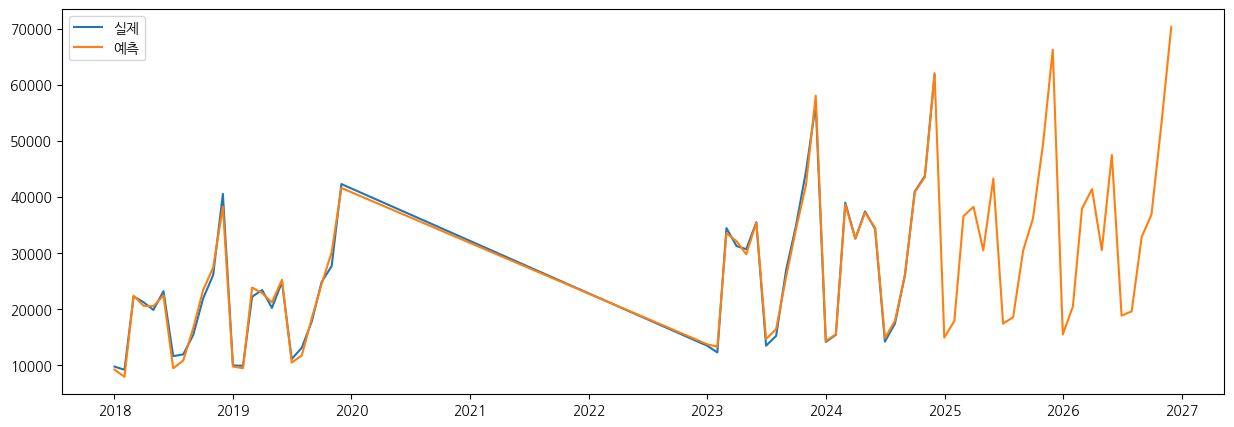

In [23]:
#그래프로 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(select_df.index, select_df['입국자수'], label='실제')
plt.plot(forescast['ds'], forescast['yhat'], label='예측')
plt.legend()
plt.show()


In [ ]:
#전체 국가 대상으로 prophet 예측
from prophet import Prophet
import pandas as pd

# 학습 데이터의 가장 최근 날짜 찾기
latest_date = df["날짜"].max()


# 모든 국가별 예측 결과를 저장할 리스트
all_forecasts = []

# 각 국가별로 Prophet 모델 학습 및 예측
for country in df["국적지역"].unique():
    # 국가별 데이터 필터링
    df_country = df[df["국적지역"] == country][["날짜", "입국자수"]].rename(columns={"날짜": "ds", "입국자수": "y"})

    # 날짜 형식 변환
    df_country["ds"] = pd.to_datetime(df_country["ds"])

    # 데이터 개수가 너무 적으면 스킵
    if df_country.shape[0] < 2:
        print(f"⚠️ {country}: 데이터 부족으로 예측 불가")
        continue

    # Prophet 모델 초기화 (일본 데이터 설정 반영)
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="multiplicative",  # 계절성을 곱셈 방식으로 적용 (트렌드 반영 강화)
    )

    # 모델 학습
    model.fit(df_country)

    # 향후 2년 예측
    future = model.make_future_dataframe(periods=12 * 2, freq="M")

    # 예측 수행
    forecast = model.predict(future)

    # 미래 데이터만 선택 (과거 데이터 제거)
    forecast = forecast[forecast["ds"] > latest_date]

    # 국가명 컬럼을 추가
    forecast["국적지역"] = country

    # 필요한 컬럼만 선택
    forecast = forecast[["국적지역", "ds", "yhat", "yhat_lower", "yhat_upper"]]

    # 리스트에 추가
    all_forecasts.append(forecast)

# 모든 국가의 예측 결과를 하나의 데이터프레임으로 결합
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)

# 결과 확인
final_forecast_df

In [ ]:
#초기 분석내용

In [345]:
# 25~26년 예상결과 값이 22~24년에 비해 너무 높게 나옴
# 모델 과대 성장 방지를 위한 조절
#성장 모델 변경 → growth='logistic'
#상한값(cap) 설정 → 최대 입국자 수의 **110%**로 제한
#과대 성장 방지를 위한 변곡점 민감도 조절 → changepoint_prior_scale=0.05

In [409]:
# 일본 데이터만 필터링
df_japan = df[df["국적지역"] == "일본"].copy()
df_prophet1 = df_japan[['입국자수']].reset_index()

df_prophet1.columns = ['ds', 'y']  # Prophet 모델용 컬럼명 변경
df_prophet1['ds'] = pd.to_datetime(df_prophet1['ds'])

# ✅ 상한값(cap)을 95% 분위수로 설정 (급격한 증가 방지)
df_prophet1["cap"] = df_prophet1["y"].quantile(0.95) * 1.05

# 하한값(floor) 설정 (2024년 최소값)
# 2024년 데이터 중 최소 입국자 수 찾기
floor_value_2024 = df_prophet1[(df_prophet1['ds'] >= '2024-01-01') & (df_prophet1['ds'] <= '2024-12-31')]["y"].min() * 1.5

# 하한값(floor) 적용
df_prophet1["floor"] = floor_value_2024

# 조절해서 모델 생성
model = Prophet(
    growth="logistic",
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.05  # 변곡점 민감도 증가 (급격한 하락 방지)
)

# 모델 학습
model.fit(df_prophet1)

11:44:09 - cmdstanpy - INFO - Chain [1] start processing
11:44:09 - cmdstanpy - INFO - Chain [1] done processing


In [410]:
df_prophet1

,ds,y,cap,floor
0,2018-01-01,170576,355752.075,220317.0
1,2018-02-01,170543,355752.075,220317.0
2,2018-03-01,296447,355752.075,220317.0
3,2018-04-01,215868,355752.075,220317.0
4,2018-05-01,229215,355752.075,220317.0
5,2018-06-01,237209,355752.075,220317.0
6,2018-07-01,232703,355752.075,220317.0
7,2018-08-01,319017,355752.075,220317.0
8,2018-09-01,249835,355752.075,220317.0
9,2018-10-01,292519,355752.075,220317.0


In [411]:
# 예측할 기간 생성
future = model.make_future_dataframe(periods=24, freq='M')
future["cap"] = df_prophet1["cap"].max()
future["floor"] = floor_value_2024
forescast1 = model.predict(future)

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [412]:
forescast1['yhat'] = forescast1['yhat'].astype(int)
forescast1[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,-550378
1,2018-02-01,-517533
2,2018-03-01,507334
3,2018-04-01,-43918
4,2018-05-01,159087
...,...,...
67,2026-07-31,809942
68,2026-08-31,273986
69,2026-09-30,235852
70,2026-10-31,313479


In [350]:
#forescast와 forescast1 합쳐서비교
forescast[['ds', 'yhat']].tail(24).merge(
    forescast1[['ds', 'yhat']].tail(24), on='ds', suffixes=('_model1', '_model2')
)


,ds,yhat_model1,yhat_model2
0,2024-12-31,188827,-1484342
1,2025-01-31,229679,-663895
2,2025-02-28,424369,1463924
3,2025-03-31,230889,-178054
4,2025-04-30,320833,551573
5,2025-05-31,328216,381268
6,2025-06-30,343826,144185
7,2025-07-31,390634,980650
8,2025-08-31,359774,714201
9,2025-09-30,369460,720354


In [351]:
df_japan

,국적지역,입국자수
날짜,,
2022-07-01,일본,13069
2022-08-01,일본,28734
2022-09-01,일본,28836
2022-10-01,일본,68687
2022-11-01,일본,64005
2022-12-01,일본,85693
2023-01-01,일본,70071
2023-02-01,일본,96723
2023-03-01,일본,194327


In [352]:
# 모든 나라 예측
all_forecasts = []

In [353]:
countries = df['국적지역'].unique()

In [354]:
countries

array(['네덜란드', '네팔', '뉴질랜드', '대만', '독일', '러시아', '말레이시아', '멕시코', '몽골',
       '미국', '미얀마', '베트남', '스페인', '싱가포르', '영국', '오스트레일리아', '우즈베키스탄',
       '이탈리아', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캄보디아', '캐나다', '태국',
       '튀르키예', '프랑스', '필리핀', '홍콩'], dtype=object)

In [355]:
df

,국적지역,입국자수
날짜,,
2022-07-01,네덜란드,2880
2022-08-01,네덜란드,2928
2022-09-01,네덜란드,2792
2022-10-01,네덜란드,3266
2022-11-01,네덜란드,2766
...,...,...
2024-08-01,홍콩,61592
2024-09-01,홍콩,39815
2024-10-01,홍콩,52005


In [356]:
df.reset_index(inplace=True)

In [357]:
df.isna().sum()

날짜      0
국적지역    0
입국자수    0
dtype: int64

In [358]:
df

,날짜,국적지역,입국자수
0,2022-07-01,네덜란드,2880
1,2022-08-01,네덜란드,2928
2,2022-09-01,네덜란드,2792
3,2022-10-01,네덜란드,3266
4,2022-11-01,네덜란드,2766
...,...,...,...
892,2024-08-01,홍콩,61592
893,2024-09-01,홍콩,39815
894,2024-10-01,홍콩,52005
895,2024-11-01,홍콩,46366


In [359]:
from prophet import Prophet
import pandas as pd

# 학습 데이터의 가장 최근 날짜 찾기
latest_date = df["날짜"].max()

# 상한값(cap) 설정 (국가별 최대값의 105%)
df["cap"] = df.groupby("국적지역")["입국자수"].transform(lambda x: x.max() * 1.05)

# 모든 국가별 예측 결과를 저장할 리스트
all_forecasts = []

# 각 국가별로 Prophet 모델 학습 및 예측
for country in df["국적지역"].unique():
    # 국가별 데이터 필터링
    df_country = df[df["국적지역"] == country][["날짜", "입국자수", "cap"]].rename(columns={"날짜": "ds", "입국자수": "y"})

    # 날짜 형식 변환
    df_country["ds"] = pd.to_datetime(df_country["ds"])

    # 데이터 개수가 너무 적으면 스킵
    if df_country.shape[0] < 2:
        print(f"⚠️ {country}: 데이터 부족으로 예측 불가")
        continue

    # Prophet 모델 초기화 (일본 데이터 설정 반영)
    model = Prophet(
        growth="logistic",  # 무한 성장 방지
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="multiplicative",  # 계절성을 곱셈 방식으로 적용 (트렌드 반영 강화)
        changepoint_prior_scale=0.03  # 변곡점 민감도 낮춤 (급격한 성장 방지)
    )

    # 모델 학습
    model.fit(df_country)

    # 향후 2년 예측
    future = model.make_future_dataframe(periods=12 * 2, freq="M")

    # 예측 구간에서도 동일한 cap 값 적용
    future["cap"] = df_country["cap"].max()

    # 예측 수행
    forecast = model.predict(future)

    # 미래 데이터만 선택 (과거 데이터 제거)
    forecast = forecast[forecast["ds"] > latest_date]

    # 국가명 컬럼을 추가
    forecast["국적지역"] = country

    # 필요한 컬럼만 선택
    forecast = forecast[["국적지역", "ds", "yhat", "yhat_lower", "yhat_upper"]]

    # 리스트에 추가
    all_forecasts.append(forecast)

# 모든 국가의 예측 결과를 하나의 데이터프레임으로 결합
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)

# 결과 확인
final_forecast_df




/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_28030/2932897192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cap"] = df.groupby("국적지역")["입국자수"].transform(lambda x: x.max() * 1.05)
23:32:49 - cmdstanpy - INFO - Chain [1] start processing


23:32:49 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
23:32:49 - cmdstanpy - INFO - Chain [1] start processing
23:32:49 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
23:32:49 - cmdstanpy - INFO - Chain [1] start processing
23:32:49 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
23:32:49 - cmdstanpy - INFO - Chain [1] start processing
23:32:49 - cmdstanpy - INFO - Chain [1] done proc

,국적지역,ds,yhat,yhat_lower,yhat_upper
0,네덜란드,2024-12-31,3686.783347,3177.536190,4181.069200
1,네덜란드,2025-01-31,3200.643930,2668.531829,3676.225032
2,네덜란드,2025-02-28,7125.747213,6636.988811,7629.650526
3,네덜란드,2025-03-31,6645.316223,6141.980799,7130.649050
4,네덜란드,2025-04-30,5737.330882,5214.727980,6260.048582
...,...,...,...,...,...
715,홍콩,2026-07-31,70485.237698,65228.853342,76697.014730
716,홍콩,2026-08-31,55840.190695,49808.023503,61673.031299
717,홍콩,2026-09-30,76588.717025,70290.627966,82459.161489
718,홍콩,2026-10-31,72814.778638,66326.216395,78404.836902


In [360]:
# 모든 국가의 예측 결과를 하나의 데이터프레임으로 결합
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)

In [361]:
final_forecast_df

,국적지역,ds,yhat,yhat_lower,yhat_upper
0,네덜란드,2024-12-31,3686.783347,3177.536190,4181.069200
1,네덜란드,2025-01-31,3200.643930,2668.531829,3676.225032
2,네덜란드,2025-02-28,7125.747213,6636.988811,7629.650526
3,네덜란드,2025-03-31,6645.316223,6141.980799,7130.649050
4,네덜란드,2025-04-30,5737.330882,5214.727980,6260.048582
...,...,...,...,...,...
715,홍콩,2026-07-31,70485.237698,65228.853342,76697.014730
716,홍콩,2026-08-31,55840.190695,49808.023503,61673.031299
717,홍콩,2026-09-30,76588.717025,70290.627966,82459.161489
718,홍콩,2026-10-31,72814.778638,66326.216395,78404.836902


In [362]:
final_forecast_df[final_forecast_df['국적지역']=='미국']

,국적지역,ds,yhat,yhat_lower,yhat_upper
216,미국,2024-12-31,81764.085063,76056.117066,87633.230833
217,미국,2025-01-31,89411.941467,83847.099601,95122.548744
218,미국,2025-02-28,139312.909048,133788.262728,144941.739239
219,미국,2025-03-31,181449.673770,175670.542528,187056.407604
220,미국,2025-04-30,154655.612855,148894.273354,160509.688310
221,미국,2025-05-31,183447.468534,177535.320823,189192.938612
222,미국,2025-06-30,151992.192267,146134.898236,157491.643186
223,미국,2025-07-31,120472.138684,114382.835802,126412.986582
224,미국,2025-08-31,145475.448099,139584.079083,150700.717344
225,미국,2025-09-30,164223.389154,158126.654846,169949.776513


In [363]:
#final_forecast_df를 정수형으로 만들기
final_forecast_df['yhat'] = final_forecast_df['yhat'].astype(int)

In [364]:
final_forecast_df

,국적지역,ds,yhat,yhat_lower,yhat_upper
0,네덜란드,2024-12-31,3686,3177.536190,4181.069200
1,네덜란드,2025-01-31,3200,2668.531829,3676.225032
2,네덜란드,2025-02-28,7125,6636.988811,7629.650526
3,네덜란드,2025-03-31,6645,6141.980799,7130.649050
4,네덜란드,2025-04-30,5737,5214.727980,6260.048582
...,...,...,...,...,...
715,홍콩,2026-07-31,70485,65228.853342,76697.014730
716,홍콩,2026-08-31,55840,49808.023503,61673.031299
717,홍콩,2026-09-30,76588,70290.627966,82459.161489
718,홍콩,2026-10-31,72814,66326.216395,78404.836902


In [365]:
final_forecast_df.loc[final_forecast_df['국적지역']=='중국']

,국적지역,ds,yhat,yhat_lower,yhat_upper
504,중국,2024-12-31,157199,1.350517e+05,1.787869e+05
505,중국,2025-01-31,791133,7.705606e+05,8.116103e+05
506,중국,2025-02-28,65950,4.511193e+04,8.781619e+04
507,중국,2025-03-31,361463,3.412138e+05,3.825705e+05
508,중국,2025-04-30,376228,3.545908e+05,3.968583e+05
509,중국,2025-05-31,515689,4.948865e+05,5.383833e+05
510,중국,2025-06-30,572875,5.502001e+05,5.928478e+05
511,중국,2025-07-31,626501,6.065604e+05,6.481113e+05
512,중국,2025-08-31,568799,5.461900e+05,5.893058e+05
513,중국,2025-09-30,468498,4.455260e+05,4.883160e+05


In [366]:
df.loc[df['국적지역']=='중국']

,날짜,국적지역,입국자수,cap
630,2022-07-01,중국,20013,569153.55
631,2022-08-01,중국,32060,569153.55
632,2022-09-01,중국,32054,569153.55
633,2022-10-01,중국,25826,569153.55
634,2022-11-01,중국,27411,569153.55
635,2022-12-01,중국,31036,569153.55
636,2023-01-01,중국,30141,569153.55
637,2023-02-01,중국,53337,569153.55
638,2023-03-01,중국,83868,569153.55
639,2023-04-01,중국,118139,569153.55


In [367]:
#국적지역, ds를 방문년월로 (yyyy-mm-dd -> yyyymm+1), yhat을 입국자수로 변경하여 저장
final_forecast_df["방문년월"] = pd.to_datetime(final_forecast_df["ds"])
final_forecast_df["방문년월"] = final_forecast_df["방문년월"].apply(lambda x: 
    str((x.year + 1) * 100 + 1) if x.month == 12 else str(x.year * 100 + x.month + 1)
)



final_forecast_df = final_forecast_df[["국적지역", "방문년월", "yhat"]]
final_forecast_df.rename(columns={"yhat": "입국자수"}, inplace=True)

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_28030/1431108815.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_forecast_df.rename(columns={"yhat": "입국자수"}, inplace=True)


In [368]:
final_forecast_df

,국적지역,방문년월,입국자수
0,네덜란드,202501,3686
1,네덜란드,202502,3200
2,네덜란드,202503,7125
3,네덜란드,202504,6645
4,네덜란드,202505,5737
...,...,...,...
715,홍콩,202608,70485
716,홍콩,202609,55840
717,홍콩,202610,76588
718,홍콩,202611,72814


/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_28030/3969971898.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.lineplot(data=final_forecast_df, x="방문년월", y="입국자수", hue="국적지역", ci=None)


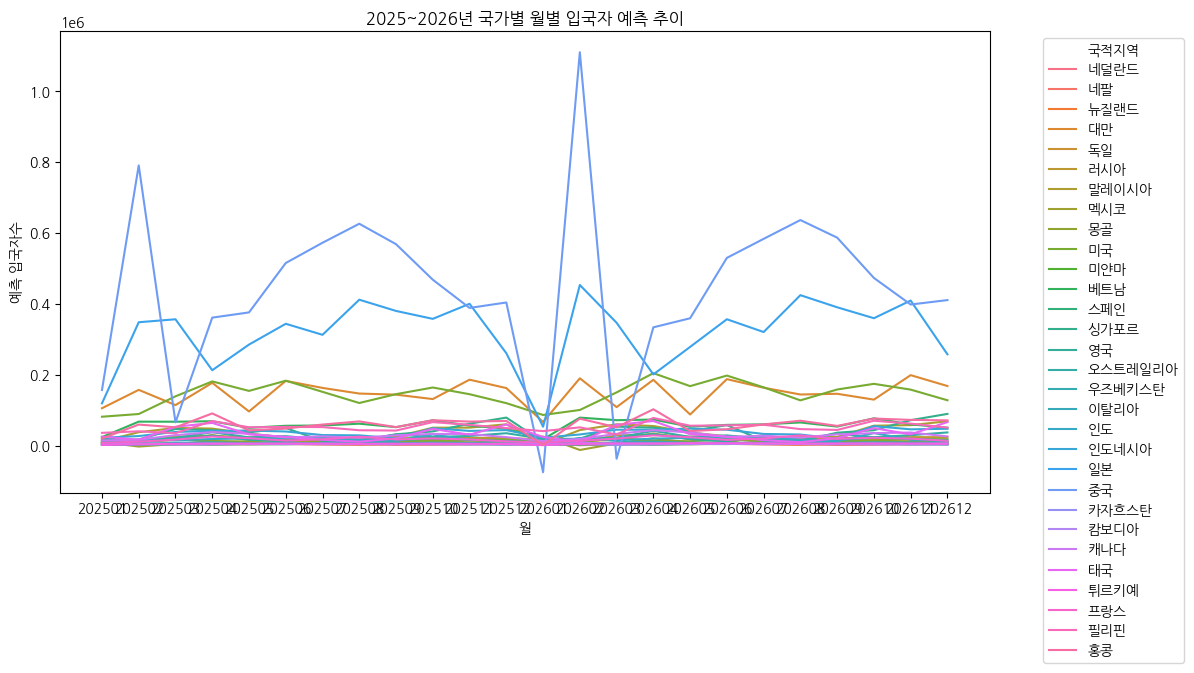

In [369]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(12, 6))
sb.lineplot(data=final_forecast_df, x="방문년월", y="입국자수", hue="국적지역", ci=None)
plt.title("2025~2026년 국가별 월별 입국자 예측 추이")
plt.xlabel("월")
plt.ylabel("예측 입국자수")
plt.legend(title="국적지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [178]:
# '방문년월'에서 연도와 월 분리
final_forecast_df['연도'] = final_forecast_df['방문년월'].astype(str).str[:4]
final_forecast_df['월'] = final_forecast_df['방문년월'].astype(str).str[4:].astype(int)

# 분기 매핑
season_mapping = {
    (3, 4, 5): "1분기 (봄 3~5월)",
    (6, 7, 8): "2분기 (여름 6~8월)",
    (9, 10, 11):"3분기 (가을 9~11월)",
    (12, 1, 2): "4분기 (겨울 12~2월)"
}

# 각 월에 대해 분기 매핑
def get_quarter(month):
    for key, value in season_mapping.items():
        if month in key:
            return value
    return None

final_forecast_df['분기'] = final_forecast_df['월'].apply(get_quarter)

# 연도-분기 컬럼 추가
final_forecast_df['연도분기'] = final_forecast_df['연도'] + "년 " + final_forecast_df['분기']

# 불필요한 컬럼 제거
final_forecast_df = final_forecast_df[['국적지역', '연도분기', '입국자수']]

# 같은 연도-분기별로 합산
df_grouped = final_forecast_df.groupby(['국적지역', '연도분기'], as_index=False)['입국자수'].sum()



/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_28030/572851082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_forecast_df['연도'] = final_forecast_df['방문년월'].astype(str).str[:4]
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_28030/572851082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_forecast_df['월'] = final_forecast_df['방문년월'].astype(str).str[4:].astype(int)


In [179]:
final_forecast_df

,국적지역,연도분기,입국자수
0,네덜란드,2025년 4분기 (겨울 12~2월),3686
1,네덜란드,2025년 4분기 (겨울 12~2월),3200
2,네덜란드,2025년 1분기 (봄 3~5월),7125
3,네덜란드,2025년 1분기 (봄 3~5월),6645
4,네덜란드,2025년 1분기 (봄 3~5월),5737
...,...,...,...
715,홍콩,2026년 2분기 (여름 6~8월),70485
716,홍콩,2026년 3분기 (가을 9~11월),55840
717,홍콩,2026년 3분기 (가을 9~11월),76588
718,홍콩,2026년 3분기 (가을 9~11월),72814


In [336]:
final_forecast_df.to_csv('data/prophet_df.csv', index=False)

In [337]:
#모델 저장
import joblib
joblib.dump(model, 'model/prophet_model.pkl')

['model/prophet_model.pkl']